# Artificial Intelligence - Fall 2020 - Laboratory 11

## _Supervised Learning:   Random Forest Classifier, Linear Classifier_

c: Alexandra Dobrescu <alexandramaria.digital@gmail.com>

### Special Task 3

Be creative and define a new concept, starting from one of the classical AI algorithms studied during this Fall. Use the one which most inspires you to expand it to a new task, technology or application.

Please consider using **your own words** to introduce **the problem** that you want to solve, **its importance** in today's world and **the solution** you bring, on a very high level and in a concise manner. 

Don't forget to **use scientific references** at the end of your assignment.

_Timeline:_ You can write your solution in a markdown section of your notebook (Lab 11, Lab 12 or Lab 13) **until the 28th of January 2021**.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# Read data

root_path = 'C:/Users/irina/Documents/Uni/AI/'

In [3]:
df = pd.read_csv(root_path + 'credit_approval.csv')

In [4]:
df.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  690 non-null    int64  
 1   1           690 non-null    int64  
 2   2           690 non-null    float64
 3   3           690 non-null    float64
 4   4           690 non-null    int64  
 5   5           690 non-null    int64  
 6   6           690 non-null    int64  
 7   7           690 non-null    float64
 8   8           690 non-null    int64  
 9   9           690 non-null    int64  
 10  10          690 non-null    int64  
 11  11          690 non-null    int64  
 12  12          690 non-null    int64  
 13  13          690 non-null    int64  
 14  14          690 non-null    int64  
 15  15          690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [6]:
df.columns

Index(['Unnamed: 0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15'],
      dtype='object')

### Exploring Data

In [7]:
import matplotlib.pyplot as plt

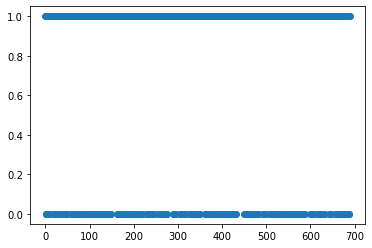

In [8]:
# Categorical attributes

plt.scatter(range(len(df)), df['1'])

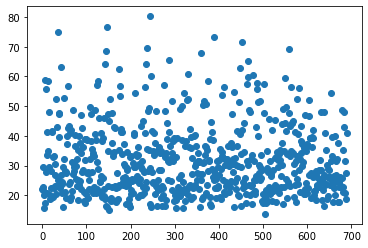

In [9]:
# Numerical attributes

plt.scatter(range(len(df)), df['2'])

### Preprocessing

### Task 0

**a)** Rename the first 14th (relevant) columns as `col1`, `col2` ... `col14` and the last column as `target`. Your function should return both the data corresponding to the _X values_ and the _Y values_.

_Hint:_ You can use the `drop` function explained [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) to eliminate the first column.

In [10]:
def clean_df(df):
    'TO DO'
    new_df = df.drop(['Unnamed: 0'], axis=1)
    new_df = new_df.rename(columns={"1": "col1", "2": "col2", "3": "col3", "4": "col4", "5": "col5", "6": "col6", "7": "col7", "8": "col8", "9": "col9", "9": "col9", "10": "col10", "11": "col11", "12": "col12", "13": "col13", "14": "col14", "15": "target"})
    dataX = new_df.iloc[:,0:-1]
    dataY = new_df.iloc[:,-1]
    return dataX, dataY

In [11]:
dataX, dataY = clean_df(df)

In [12]:
# Verify result
dataX.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159


In [13]:
dataY.head()

0    0
1    0
2    0
3    1
4    1
Name: target, dtype: int64

**b)** Which columns could be classified as categorical? Plot one column of your choice containing numerical values. Justify your choice (please use the `markdown` option provided in your notebook).

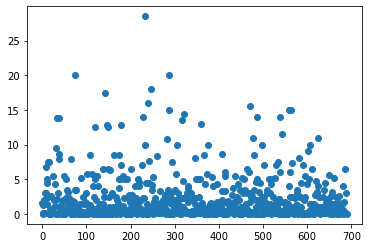

In [14]:
# TO DO: 
plt.scatter(range(len(df)), dataX['col7']) # This is a numeric column

Categorical columns are: col1, col8, col9, col11 (which could be one-hot encoded). It is also possible that columns col4, col5, col6, col10, col12 and even col13 and col14 have categorical values if they are label encoded. I think that col2, col3 and col7 have numerical values. But I don't think there's any way to know for sure.

In [15]:
# Verify result
dataY.head()

0    0
1    0
2    0
3    1
4    1
Name: target, dtype: int64

**c)** Does the data stored in the `target` data frame have numerical attributes? Besides the graphical representation, how can the values of a column be classified as numerical or categorical?

TO DO:
I think the data in the column target has categorical attributes, not numerical. In order to decide whether the values of a column are numerical or categorical, we could observe whether the values are discrete (categorical) or continuous (numerical).

### Normalization

### Task 1

The following formula computes a _Z score_ and measures how far a single raw data value is from the population mean.

\begin{equation*}
z = \frac{X - \mu }{\sigma }
\end{equation*}

where:
* **_X_** is a single raw data value
* `mu` is the population mean
* `sigma` is the population standard deviation

The `compute_stats` function receives a `DataFrame object` for which builds a `stats DataFrame` where the mean and standard deviation are computed for each column of the input.

The final result should have 3 columns:
* the name of the column for which the mean and the standard deviation were computed,
* the mean column computed for the values in the corresponding column,
* the standard deviation computed for the values in the corresponding column.

_Hints:_ 
1. You might want to use `df.loc` property [which can be found here.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html)

2. Verify your data by using `notnull()` [function.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.notnull.html)

You may use:
`df.loc[df[column_name].notnull(), column_name]` to access all the elements of a column that are not null.

In [16]:
def compute_stats(df):
    # Create a new DataFrame using df's columns as a starting point
    # stats = ...
    'TO DO'
    ds = {'name': df.columns}
    stats = pd.DataFrame(data=ds)
    
    # Initialise the mean and std column by 0
    'TO DO'
    stats['mean'] = 0
    stats['std'] = 0
    
    # Iterate through the columns of df and for each column compute mean and std.
    for col in df.columns:
        'TO DO'
        stats.loc[stats.name == col, 'mean'] = df.loc[df[col].notnull(), col].mean()
        stats.loc[stats.name == col, 'std'] = df.loc[df[col].notnull(), col].std()
    return stats

In [17]:
stats_dataX = compute_stats(dataX)

In [18]:
# Expected Output:
stats_dataX

,name,mean,std
0,col1,0.678261,0.467482
1,col2,31.568203,11.853273
2,col3,4.758725,4.978163
3,col4,1.766667,0.430063
4,col5,7.372464,3.683265
5,col6,4.692754,1.992316
6,col7,2.223406,3.346513
7,col8,0.523188,0.499824
8,col9,0.427536,0.495080
9,col10,2.400000,4.862940


To finish this task, use the `stats DataFrame` computed before and compute the _Z score_ formula.

In [19]:
def normalize(df, s):
    # Iterate through the columns of df
    df_std = df.copy()
    for col in df.columns:
        # Use the df.loc property & notnull() to select data
        'TO DO'
        df_std[col] = (df_std[col] - df_std[col].mean()) / df_std[col].std()
    return df_std

In [20]:
norm_dataX = normalize(dataX, stats_dataX)

In [21]:
# Expected Output:
norm_dataX.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14
0,0.688238,-0.800471,1.346134,0.542556,-0.915618,-0.347713,-0.190767,-1.046745,-0.863570,-0.493529,1.087120,0.237655,-0.488004,0.037353
1,-1.450880,-0.750696,0.450221,0.542556,0.170375,-0.347713,-0.615090,-1.046745,-0.863570,-0.493529,-0.918529,0.237655,-0.139490,-0.195272
2,-1.450880,-0.167735,-0.604384,-1.782685,-0.915618,-0.347713,-0.290872,-1.046745,-0.863570,-0.493529,1.087120,0.237655,0.557539,-0.195272
3,-1.450880,-0.835061,1.354169,-1.782685,-0.644120,-0.849641,-0.664395,0.953958,1.156306,1.768477,1.087120,0.237655,-1.068862,-0.195272
4,0.688238,-0.961608,0.685248,0.542556,-0.372622,-0.347713,-0.078711,0.953958,1.156306,2.385388,-0.918529,0.237655,-0.720347,-0.164946


### Task 2
 
Fill in the missing elements in:
 
**a)** the `get_score` function below:

In [22]:
from sklearn.metrics import roc_auc_score

In [23]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train.values.ravel())
    # train_roc_scores = TO DO
    train_roc_scores = roc_auc_score(y_train,model.predict(X_train))
    # test_roc_scores = TO DO
    test_roc_scores = roc_auc_score(y_test,model.predict(X_test))
    return train_roc_scores, test_roc_scores

In [24]:
# Perform k-fold manually
 
dataX_i = list(dataX.index.values)
 
import random
 
random.shuffle(dataX_i)

**b)** Store the rearranged indices in 5 different lists, congregated in the list of lists `xi`.

In [41]:
# xi = TO DO
xi = []
n = int(len(dataX_i)/5)
for i in range(0, len(dataX_i), n):
    xi.append(dataX_i[i:i + n])

In [42]:
print(xi)

[[128, 675, 538, 626, 168, 483, 72, 245, 166, 122, 640, 362, 465, 369, 55, 19, 526, 684, 53, 343, 165, 268, 237, 332, 653, 520, 162, 530, 645, 570, 266, 324, 58, 201, 184, 472, 404, 77, 271, 399, 514, 620, 170, 457, 156, 376, 477, 150, 350, 293, 668, 344, 417, 432, 149, 613, 327, 453, 542, 17, 395, 307, 73, 226, 476, 218, 642, 387, 541, 512, 181, 172, 262, 65, 598, 602, 56, 259, 192, 241, 433, 398, 159, 624, 413, 125, 375, 347, 188, 117, 521, 180, 353, 649, 32, 515, 454, 85, 489, 7, 211, 272, 63, 195, 291, 443, 223, 207, 301, 348, 416, 511, 402, 326, 590, 560, 420, 629, 297, 605, 596, 357, 229, 199, 544, 47, 543, 102, 364, 380, 217, 575, 425, 349, 442, 312, 564, 565], [663, 555, 468, 255, 292, 70, 438, 495, 571, 28, 133, 313, 290, 584, 660, 323, 144, 154, 174, 46, 667, 658, 167, 177, 196, 595, 116, 68, 27, 329, 263, 69, 42, 361, 142, 366, 24, 139, 29, 302, 659, 491, 308, 236, 131, 547, 147, 295, 401, 383, 132, 641, 486, 115, 424, 16, 152, 676, 95, 278, 687, 441, 97, 93, 83, 487, 202, 1

In [49]:
train_scores_lr = []
test_scores_lr = []

### Cross Validation

Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model. In typical cross-validation, the training and validation sets must cross-over in successive rounds such that each data point has a chance of being validated against. [Source](https://doi.org/10.1007/978-0-387-39940-9_565)

One example of _Cross Validation_ techniques that can be useful is represented by k-fold cross validation. In our exercise, let us set the value of `k=5` such that we test different portions of our dataset and verify the performance of the model.

In [50]:
i=0
while i < 5:
    test_xi = np.asarray(xi[i]) 
    train_xi = np.concatenate(xi[:i] + xi[i+1:])
    
    X_train, X_test = dataX.iloc[train_xi, :], dataX.iloc[test_xi, :]
    y_train, y_test = dataY.iloc[train_xi], dataY.iloc[test_xi]
    
    # Compute stats and normalize data
    stats = compute_stats(X_train)
    
    X_train = normalize(X_train, stats)
    X_test = normalize(X_test, stats)
    
    # Perform Logistic Regression
    logReg = LogisticRegression(solver='liblinear')
    #TO DO
    logReg.fit(X_train, y_train)
    
    # Evaluate model
    train_slr, test_slr = get_score(logReg, X_train, X_test, y_train, y_test)
    
    # Store the obtained results for further comparisons
    train_scores_lr.append(train_slr)
    test_scores_lr.append(test_slr)
    
    i += 1

In [51]:
print('Logistic Regression scores TRAIN: ', train_scores_lr)
print('Logistic Regression scores TEST: ', test_scores_lr)

Logistic Regression scores TRAIN:  [0.8769761730935156, 0.8711538461538462, 0.8790004645914914, 0.8850806451612903, 0.8764945002391201]
Logistic Regression scores TEST:  [0.8628205128205129, 0.8607315535001051, 0.8544871794871796, 0.8583994850890366, 0.8582073664040878]


In [53]:
dataScores = pd.DataFrame()
dataScores['LR scores train'] = train_scores_lr
dataScores['LR scores test'] = test_scores_lr
dataScores.to_csv(root_path + 'scores.csv')
dataScores

,LR scores train,LR scores test
0,0.876976,0.862821
1,0.871154,0.860732
2,0.879000,0.854487
3,0.885081,0.858399
4,0.876495,0.858207


### Task 3

**a)** Implement for this problem a Random Forest Classifier using the [sklearn library module](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) and optimise its parameters. Justify your conclusions. Add new columns to `dataScores DataFrame` for the obtained results.

**b)** Implement for this problem a Linear Classifier using the [sklearn library module](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) and optimise its parameters. Justify your conclusions. Add new columns to `dataScores DataFrame` for the obtained results.

**c)** Which algorithm performed best? Why?

In [61]:
#a
from sklearn.ensemble import RandomForestClassifier

train_scores_rfc = []
test_scores_rfc = []

i=0
while i < 5:
    test_xi = np.asarray(xi[i]) 
    train_xi = np.concatenate(xi[:i] + xi[i+1:])
    
    X_train, X_test = dataX.iloc[train_xi, :], dataX.iloc[test_xi, :]
    y_train, y_test = dataY.iloc[train_xi], dataY.iloc[test_xi]
    
    # Compute stats and normalize data
    stats = compute_stats(X_train)
    
    X_train = normalize(X_train, stats)
    X_test = normalize(X_test, stats)
    
    # Perform Random Forest Classification
    classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
    classifier.fit(X_train, y_train)
    
    # Evaluate model
    train_srfc, test_srfc = get_score(classifier, X_train, X_test, y_train, y_test)
    
    # Store the obtained results for further comparisons
    train_scores_rfc.append(train_srfc)
    test_scores_rfc.append(test_srfc)
    
    i += 1

dataScores['RFC scores train'] = train_scores_rfc
dataScores['RFC scores test'] = test_scores_rfc
dataScores.to_csv(root_path + 'scores.csv')
dataScores

,LR scores train,LR scores test,RFC scores train,RFC scores test,LinR scores train,LinR scores test
0,0.876976,0.862821,1.000000,0.897436,0.937824,0.926709
1,0.871154,0.860732,1.000000,0.874816,0.930943,0.964684
2,0.879000,0.854487,1.000000,0.819231,0.939616,0.925214
3,0.885081,0.858399,1.000000,0.852178,0.938893,0.929414
4,0.876495,0.858207,0.997967,0.833617,0.944856,0.901852


In [62]:
#b
from sklearn.linear_model import LinearRegression

train_scores_linr = []
test_scores_linr = []

i=0
while i < 5:
    test_xi = np.asarray(xi[i]) 
    train_xi = np.concatenate(xi[:i] + xi[i+1:])
    
    X_train, X_test = dataX.iloc[train_xi, :], dataX.iloc[test_xi, :]
    y_train, y_test = dataY.iloc[train_xi], dataY.iloc[test_xi]
    
    # Compute stats and normalize data
    stats = compute_stats(X_train)
    
    X_train = normalize(X_train, stats)
    X_test = normalize(X_test, stats)
    
    # Perform Random Forest Classification
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    
    # Evaluate model
    train_linr, test_linr = get_score(regressor, X_train, X_test, y_train, y_test)
    
    # Store the obtained results for further comparisons
    train_scores_linr.append(train_linr)
    test_scores_linr.append(test_linr)
    
    i += 1

dataScores['LinR scores train'] = train_scores_linr
dataScores['LinR scores test'] = test_scores_linr
dataScores.to_csv(root_path + 'scores.csv')
dataScores

,LR scores train,LR scores test,RFC scores train,RFC scores test,LinR scores train,LinR scores test
0,0.876976,0.862821,1.000000,0.897436,0.937824,0.926709
1,0.871154,0.860732,1.000000,0.874816,0.930943,0.964684
2,0.879000,0.854487,1.000000,0.819231,0.939616,0.925214
3,0.885081,0.858399,1.000000,0.852178,0.938893,0.929414
4,0.876495,0.858207,0.997967,0.833617,0.944856,0.901852


c. It appears Linear Regression worked best on the test set, which is surprizing, since it's the simplest algorithm I tried. I don't know why this happened.

# Feedback
Very interesting lab. I don't think I solved everything the way you wanted us to (see the normalization function) but I tried to get all the tasks done in some way or another. Looking forward to more ML next time :) 